# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [40]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv("./../../assets/datasets/Sacramentorealestatetransactions.csv")

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [47]:
#cleaning out values with 0 sqft and price
columns = data.columns.values
data = data[data["sq__ft"] != 0]
data = data[data["price"] > 2000]
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000
mean,95761.587946,3.244772,1.95818,1585.942189,229728.134071,38.577150,-121.378994
std,85.352045,0.852619,0.66638,647.423526,119633.032607,0.126356,0.119490
min,95603.000000,1.000000,1.00000,484.000000,30000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.00000,1144.000000,148750.000000,38.473814,-121.451520
50%,95820.000000,3.000000,2.00000,1418.000000,208000.000000,38.591822,-121.405912
75%,95828.000000,4.000000,2.00000,1851.000000,285000.000000,38.674864,-121.326187
max,95864.000000,8.000000,5.00000,4400.000000,884790.000000,39.008159,-120.597599


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

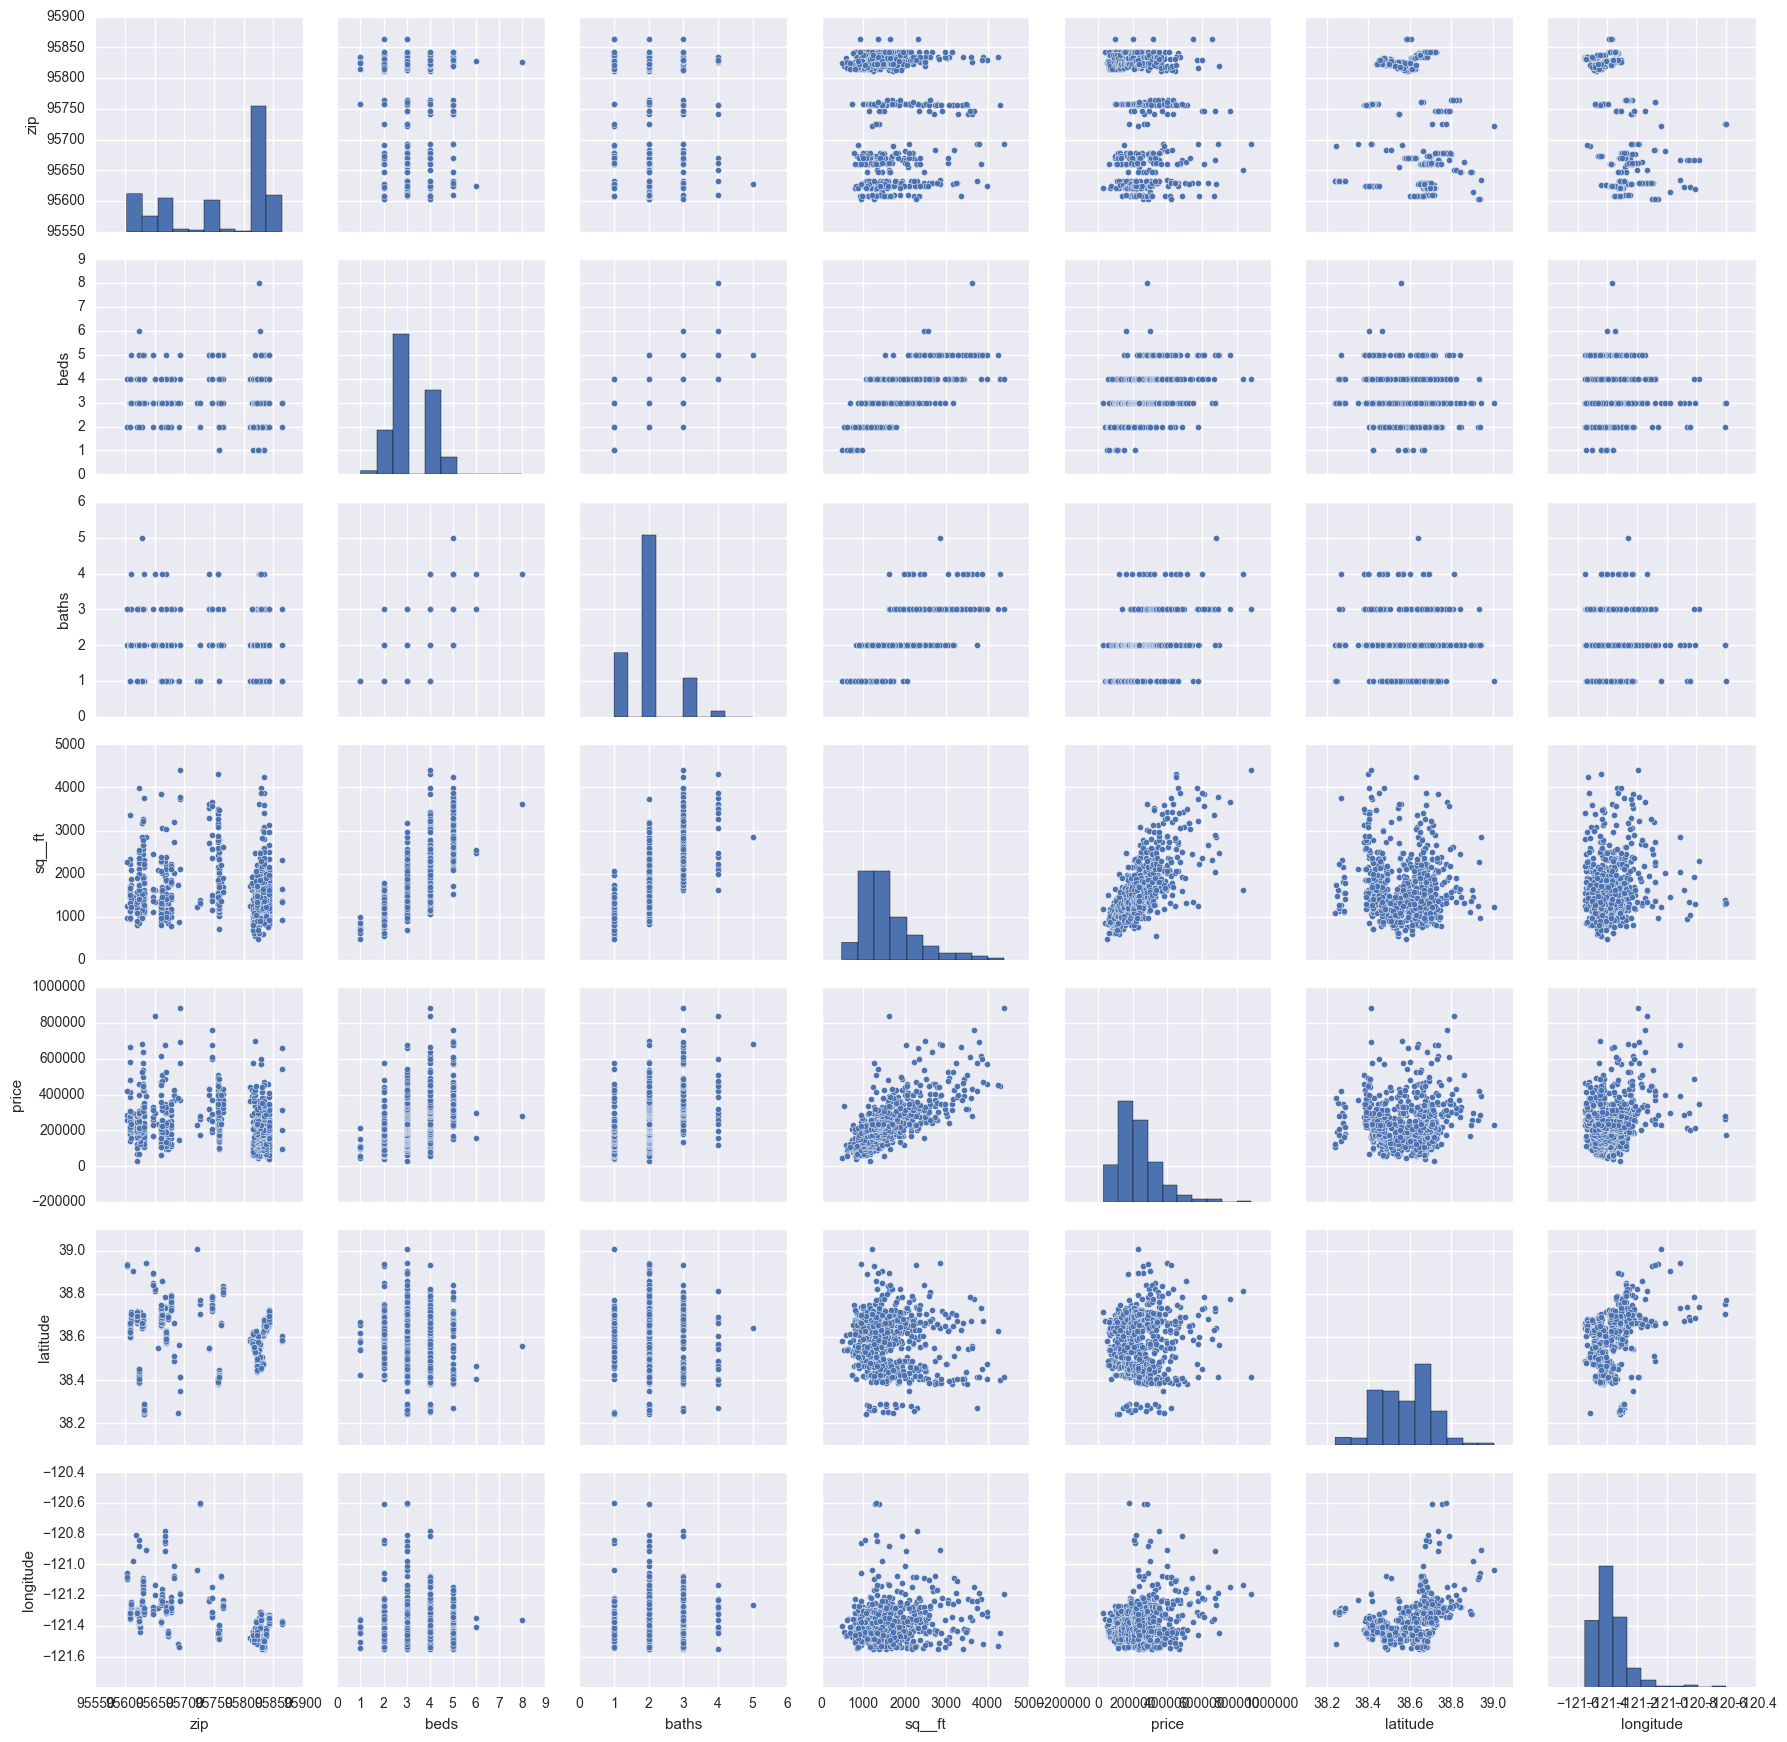

In [45]:
sns.pairplot(data)

In [48]:
columns

array(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'], dtype=object)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

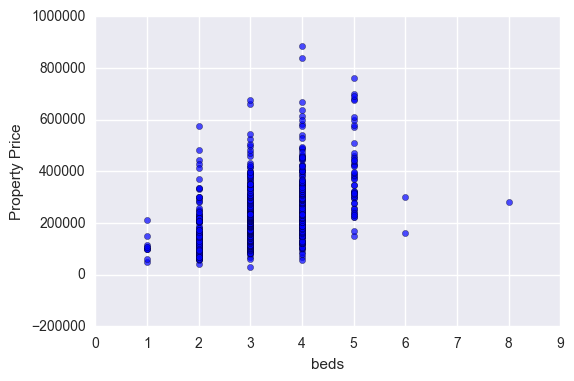

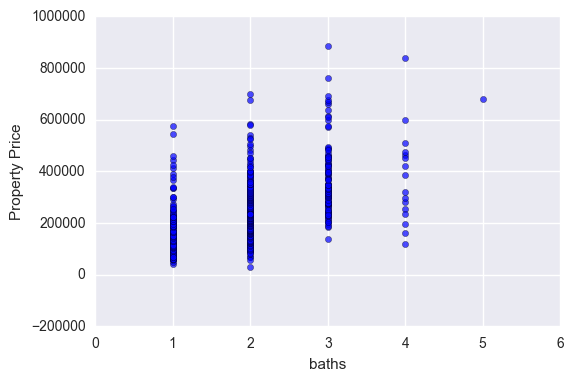

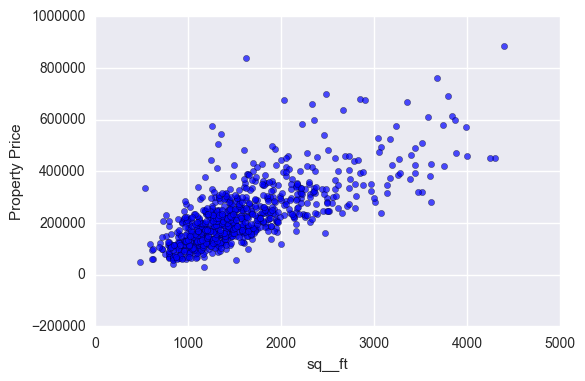

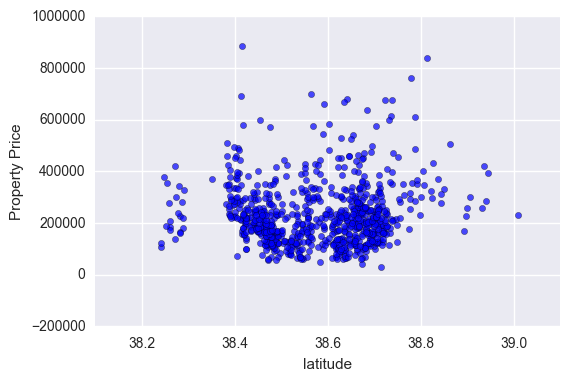

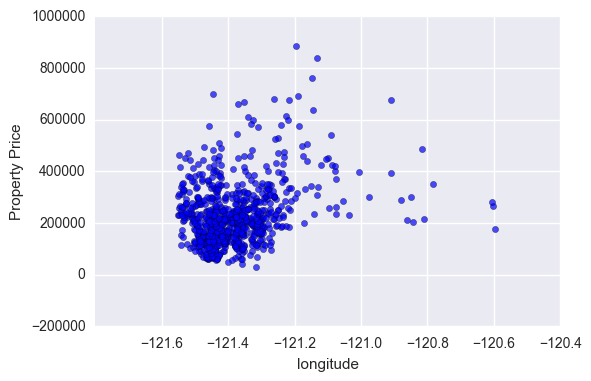

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt

plotCols = ['beds', 'baths', 'sq__ft', 'latitude', 'longitude']
for i in plotCols:
    x = data[i]
    y = data['price']

    plt.scatter(x, y, alpha=0.7)
    plt.xlabel(i)
    plt.ylabel("Property Price")
    plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [62]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

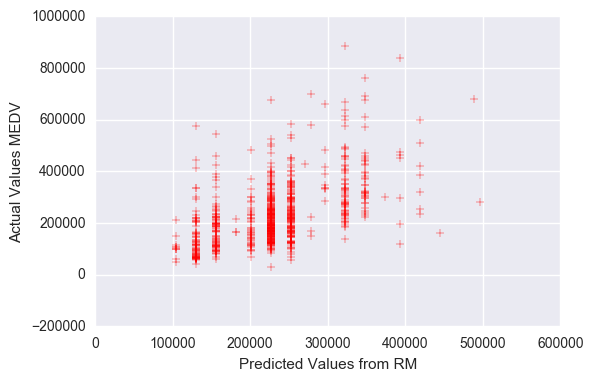

beds  vs  baths MSE: 10259190675.2


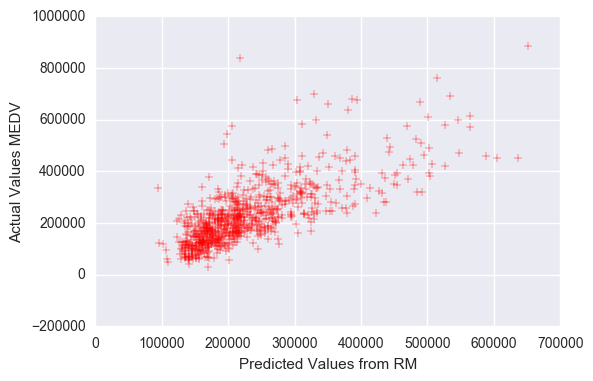

beds  vs  sq__ft MSE: 6519863139.73


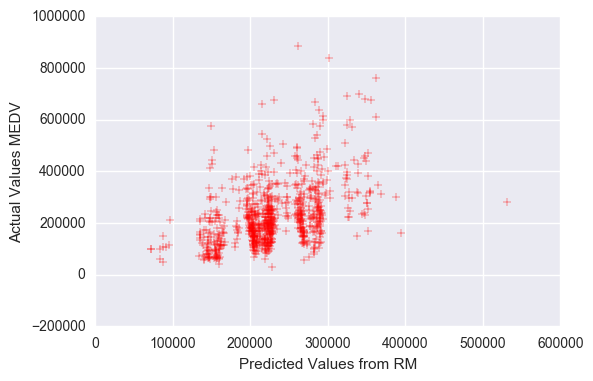

beds  vs  latitude MSE: 11339346707.2


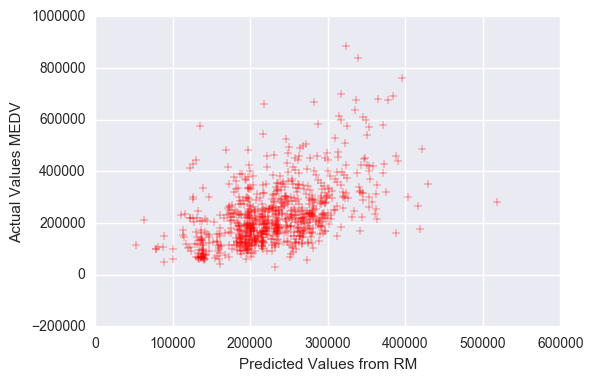

beds  vs  longitude MSE: 10535012542.0


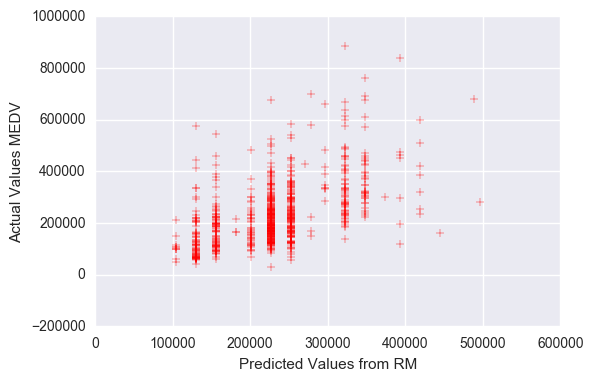

baths  vs  beds MSE: 10259190675.2


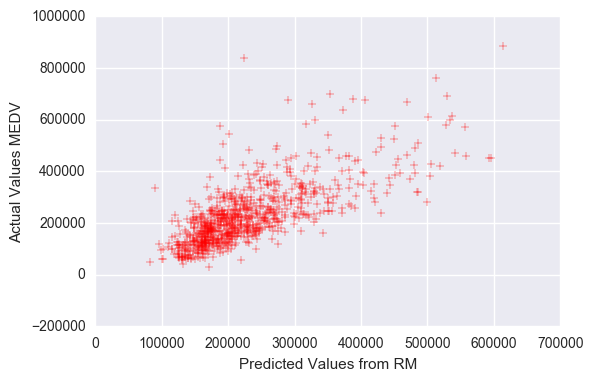

baths  vs  sq__ft MSE: 6699499185.92


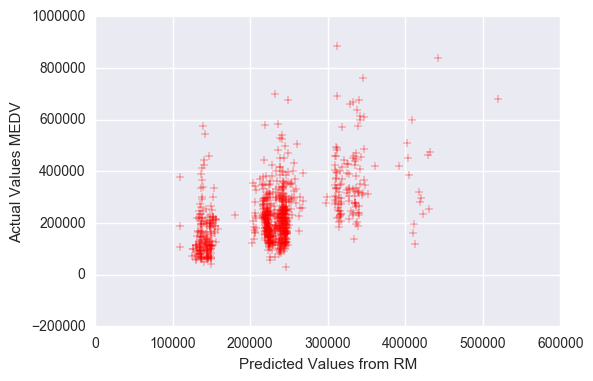

baths  vs  latitude MSE: 10395418776.9


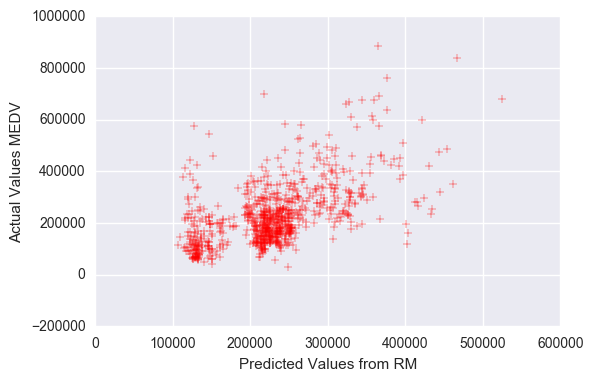

baths  vs  longitude MSE: 9750501345.49


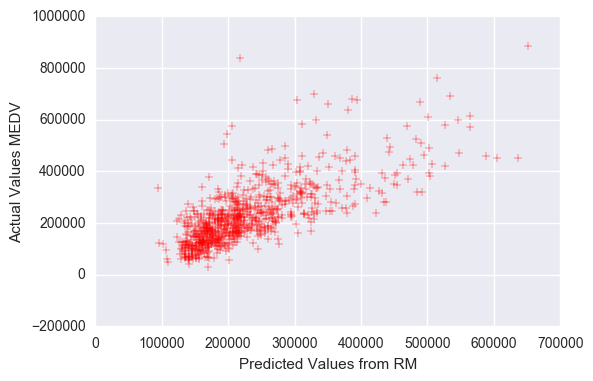

sq__ft  vs  beds MSE: 6519863139.73


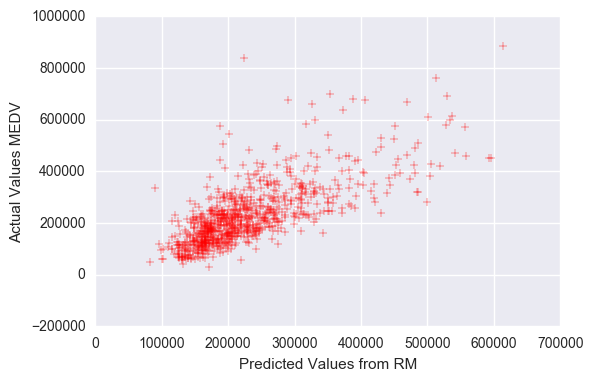

sq__ft  vs  baths MSE: 6699499185.92


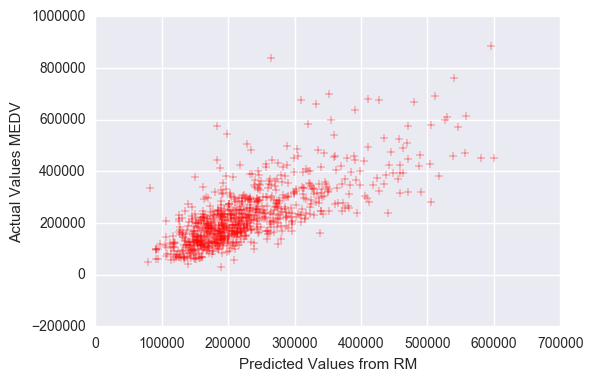

sq__ft  vs  latitude MSE: 6460355726.65


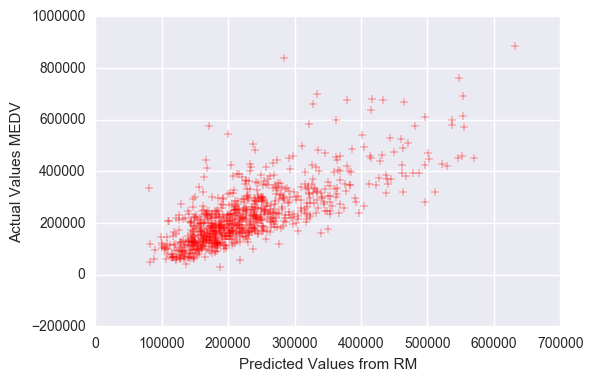

sq__ft  vs  longitude MSE: 6153244966.45


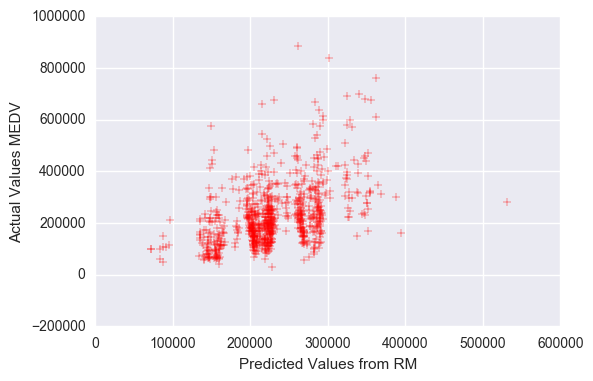

latitude  vs  beds MSE: 11339346707.2


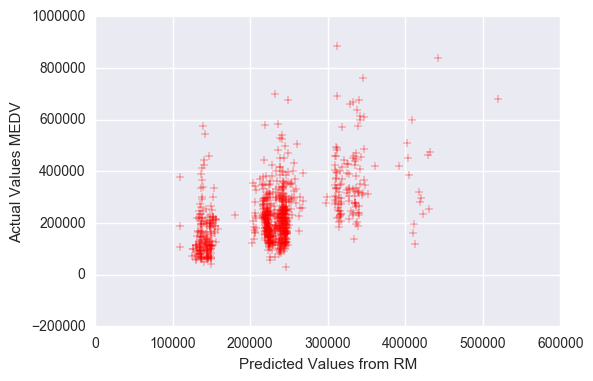

latitude  vs  baths MSE: 10395418776.9


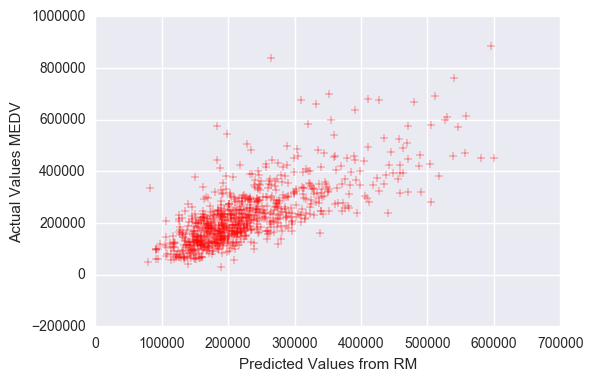

latitude  vs  sq__ft MSE: 6460355726.65


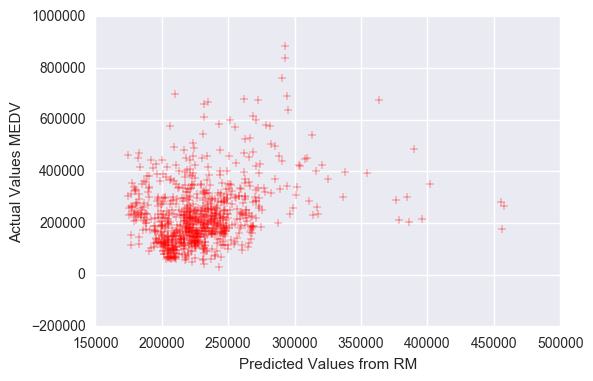

latitude  vs  longitude MSE: 13108491188.8


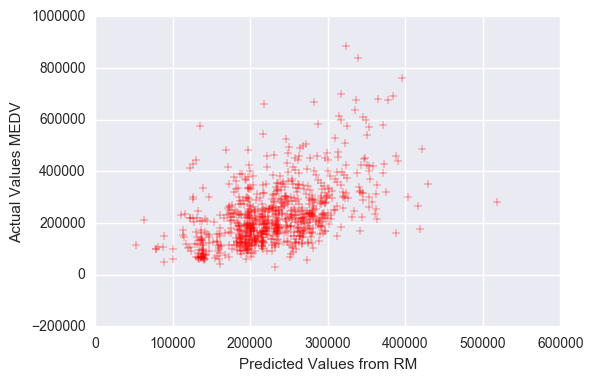

longitude  vs  beds MSE: 10535012542.0


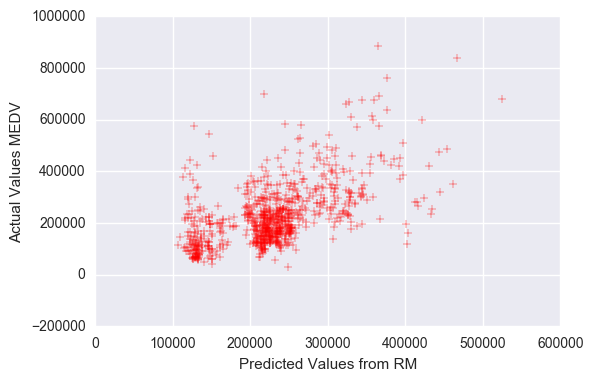

longitude  vs  baths MSE: 9750501345.49


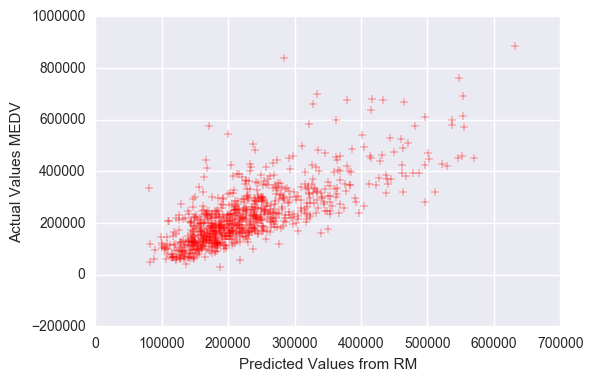

longitude  vs  sq__ft MSE: 6153244966.45


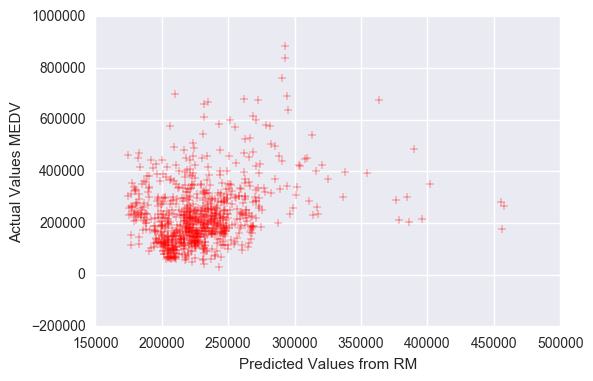

longitude  vs  latitude MSE: 13108491188.8


6153244966.4453297

In [73]:
tyy = True
lm = linear_model.LinearRegression()

for title in plotCols:
    for titles2 in plotCols:
        if title == titles2:
            continue
        else:
            X = data[[title, titles2]]
            y = data[['price']]
        model = lm.fit(X, y)
        predictions = lm.predict(X)
        if tyy:
            lowest = mean_squared_error(y, predictions)
            tyy=False

        if mean_squared_error(y, predictions) < lowest:
            lowest = mean_squared_error(y, predictions)

        plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
        plt.xlabel("Predicted Values from RM")
        plt.ylabel("Actual Values MEDV")
        plt.show()
        print title, ' vs ', titles2, "MSE:", mean_squared_error(y, predictions)  
              
lowest

In [ ]:
Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()

In [75]:
lm = linear_model.LinearRegression()

X = data[["longitude", "sq__ft"]]
y = data["price"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values from RM")
# plt.ylabel("Actual Values MEDV")
# plt.show()
print "MSE:", mean_squared_error(y, predictions)

MSE: 6153244966.45


## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?